In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from gfatpy.lidar.preprocessing import preprocess
from gfatpy.lidar.plot.quicklook import quicklook_xarray
from gfatpy.lidar.preprocessing.gluing_proportional import gluing
from gfatpy.utils.utils import moving_average


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
nc = preprocess("../tests/datos/MULHACEN/1a/2021/07/05/mhc_1a_Prs_rs_xf_20210705.nc")

In [26]:
gl, error, gluing_height = gluing(
    nc.signal_532xpa,
    nc.signal_532xpp
)

In [31]:
nc.dims

Frozen({'time': 817, 'range': 2666, 'channel': 10})

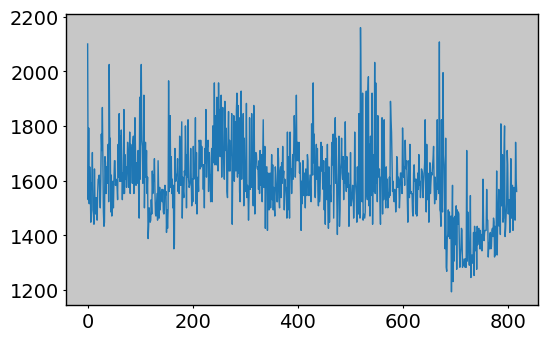

In [34]:
plt.plot(gluing_height)

In [16]:
signal = {}
signal['an'] = nc.signal_532xpa.sel(time=slice('20210705T180000.0', '20210705T190000.0')).mean('time')*nc.range**2
signal['pc'] = nc.signal_532xpp.sel(time=slice('20210705T180000.0', '20210705T190000.0')).mean('time')*nc.range**2
signal['gl'] = gl.sel(time=slice('20210705T180000.0', '20210705T190000.0')).mean('time')

(0.0, 5000.0)

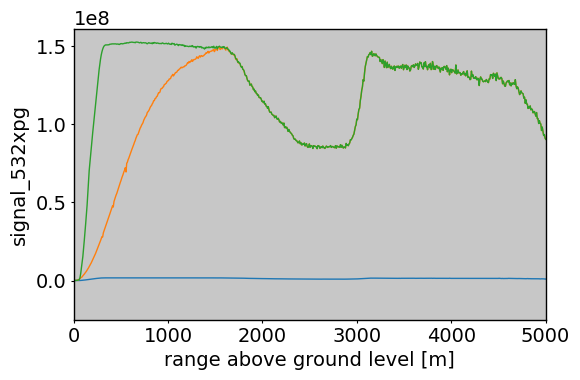

In [21]:
fig, ax = plt.subplots()
signal['an'].plot(ax=ax, label='an')
signal['pc'].plot(ax=ax)
signal['gl'].plot(ax=ax)
ax.set_xlim(0,5000)

(0.0, 5000.0)

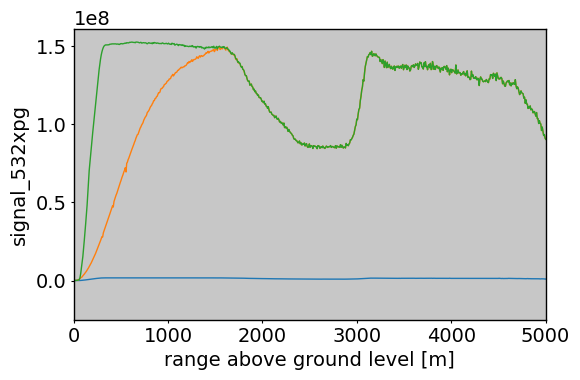

In [22]:
fig, ax = plt.subplots()
for mode_ in signal.keys():
    signal[mode_].plot(ax=ax, label=mode_)
ax.set_xlim(0,5000)

In [23]:
gl.time


<xarray.DataArray 'time' (time: 817)>
array(['2021-07-05T09:11:56.000000256', '2021-07-05T09:12:55.000000000',
       '2021-07-05T09:13:54.000000000', ..., '2021-07-05T23:56:55.000000256',
       '2021-07-05T23:57:54.000000000', '2021-07-05T23:58:54.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-07-05T09:11:56.000000256 ... 2021-07-...
Attributes:
    standard_name:  time

In [ ]:
quicklook_xarray(
    gl, is_rcs=True)

In [ ]:
xr.apply_ufunc(
    moving_average,
    gl, 2
)

In [ ]:
quicklook_xarray(nc.signal_532xpa, is_rcs=False)

In [ ]:
quicklook_xarray(nc.signal_532xpp, is_rcs=False)

In [ ]:
vals.argmin(axis = 1)

In [ ]:
plt.plot(gl.argmin(axis = 1) * 7.5 + 1200)
plt.show()

In [ ]:
plt.plot(vals.argmin(axis = 1) * 7.5 + 1200)
plt.show()

In [ ]:
quicklook_xarray(nc.signal_532xpa, is_rcs=False)
plt.scatter(nc.time.values, vals.argmin(axis = 1) * 7.5 + 1200, c = "w", s = 5)
plt.show()